In [4]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import torch
import torch.nn as nn

In [1]:
# prompt: write code to connect with the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
data = pd.read_csv("/content/drive/My Drive/Glioma Grading.csv")

In [6]:
data.head()

,Case_ID,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
0,TCGA-DU-8164,0,51.30,white,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-QH-A6CY,0,38.72,white,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,TCGA-HW-A5KM,0,35.17,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCGA-E1-A7YE,1,32.78,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,TCGA-S9-A6WG,0,31.51,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

In [8]:

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

# Fill missing values in numeric columns with their median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill missing values in categorical columns with the mode (most frequent value)
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


In [10]:
# Basic statistics
print("\nSummary statistics for numerical columns:")
print(data.describe())


Summary statistics for numerical columns:
           Gender  Age_at_diagnosis        IDH1        TP53        ATRX  \
count  839.000000        839.000000  839.000000  839.000000  839.000000   
mean     0.418355         50.935411    0.481526    0.414779    0.258641   
std      0.493583         15.702339    0.499957    0.492978    0.438149   
min      0.000000         14.420000    0.000000    0.000000    0.000000   
25%      0.000000         38.055000    0.000000    0.000000    0.000000   
50%      0.000000         51.550000    0.000000    0.000000    0.000000   
75%      1.000000         62.800000    1.000000    1.000000    1.000000   
max      1.000000         89.290000    1.000000    1.000000    1.000000   

             PTEN        EGFR         CIC       MUC16      PIK3CA  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     0.168057    0.133492    0.132300    0.116806    0.087008  ...   
std      0.374140    0.340309    0.339019    0.321380    0.

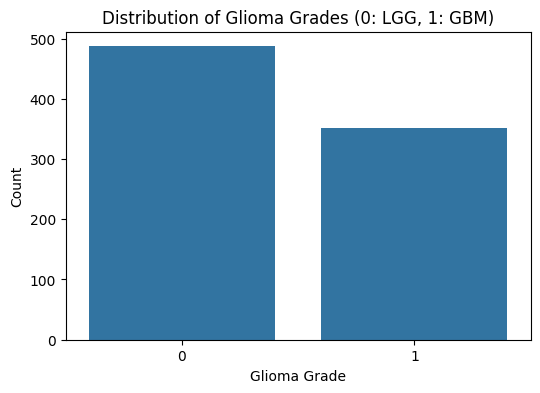

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Grade', data=data)
plt.title("Distribution of Glioma Grades (0: LGG, 1: GBM)")
plt.xlabel("Glioma Grade")
plt.ylabel("Count")
plt.show()


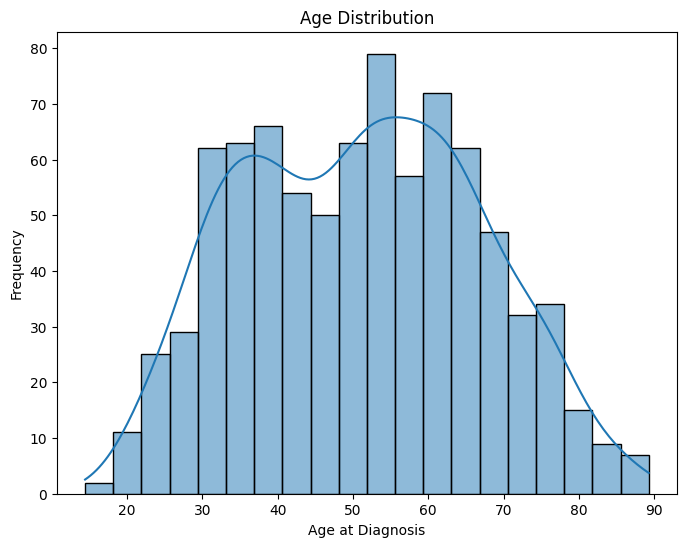

In [13]:
# Visualize distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age_at_diagnosis'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age at Diagnosis")
plt.ylabel("Frequency")
plt.show()